# **<font color=white> 03.PCA Code 실습**

[목적]
  - Dimensionality Reduction 중 가장 보편적으로 사용되는 PCA Code 실습 진행
  - Variance를 Maximize 하는 기법
  - Class Label, Learning Algorithm이 아님
  
[Process]
  1. Define Data
  2. Modeling
  3. Plotting

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data

from keras.datasets import mnist
from sklearn.decomposition import PCA

In [34]:
# MNIST Data Loading
(X_train, Y_train),(X,y) = mnist.load_data()

del X_train
del Y_train

In [35]:
X.shape

(10000, 28, 28)

In [36]:
# Data Shape 확인
print(">>>> MNIST Data Shape : {}".format(X.shape))
print(">>>> MNIST Label Shape : {}".format(y.shape))

>>>> MNIST Data Shape : (10000, 28, 28)
>>>> MNIST Label Shape : (10000,)


In [37]:
# Flatten (1, 28, 28) to (1, 784)
X = X.reshape(-1, 28*28)

In [38]:
X.shape

(10000, 784)

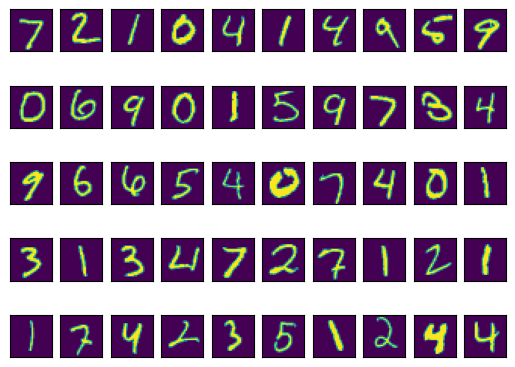

In [39]:
# MNIST Visualization
def show_images(num_images):
    if num_images % 10 == 0 and num_images <= 100:
        for digit_num in range(0,num_images): 
            plt.subplot(int(num_images/10),10,digit_num+1) #create subplots
            mat_data = X[digit_num].reshape(28,28)  #reshape images
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis
show_images(50)

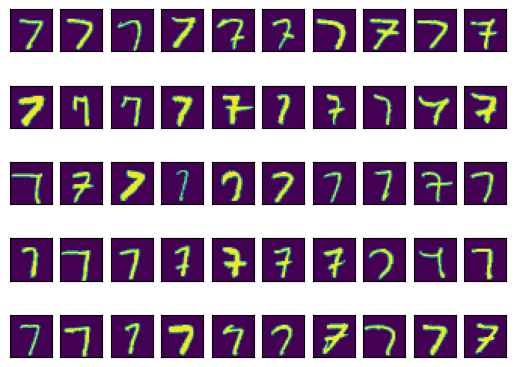

In [40]:
# 특정 숫자 보여주기
def show_images_by_digit(digit_to_see):
    if digit_to_see in list(range(10)):
        indices = np.where(y == digit_to_see) # pull indices for num of interest
        for digit_num in range(0,50): 
            plt.subplot(5,10, digit_num+1) #create subplots
            #reshape images
            mat_data = X[indices[0][digit_num]].reshape(28,28)
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis
show_images_by_digit(7)

[PCA Parameters]
  - Packge : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
  - n_components : 몇개의 축으로 차원을 축소할 것인가
  - explained_variance_ : The amount of variance explained by each of the selected components.
  - explained_variance_ratio_ : Percentage of variance explained by each of the selected components.

In [41]:
# PCA Fitting
pca = PCA(n_components = 20)
X_pca = pca.fit_transform(X)
print("PCA Output shape : {}".format(X_pca.shape))

PCA Output shape : (10000, 20)


In [42]:
# EigenValue
print(pca.explained_variance_)

[345318.19879505 259288.99521493 211037.32490989 186474.20544222
 172914.01504823 145939.06070516 113806.35947803 101395.54092698
  93819.77927135  78291.75072091  73337.85133355  72007.98420701
  59315.6288809   57936.13566526  54166.63309909  51364.95998891
  44763.27061059  43937.45691449  40557.03046984  39457.01348768]


In [43]:
# EigenValue Ratio
print(pca.explained_variance_ratio_)

[0.10047663 0.07544487 0.06140516 0.05425807 0.05031249 0.04246363
 0.03311404 0.02950288 0.02729858 0.02278041 0.02133899 0.02095204
 0.01725896 0.01685758 0.01576077 0.01494557 0.01302469 0.01278441
 0.01180081 0.01148074]


In [44]:
sum(pca.explained_variance_ratio_)

0.6532613213655447

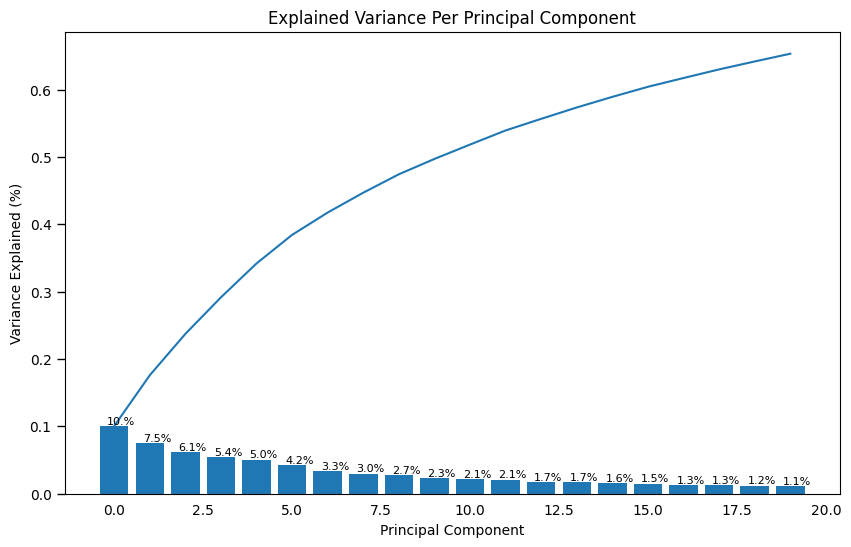

In [45]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(round(vals[i]*100,1))[:3])), (ind[i]+0.2, vals[i]), 
                    va="bottom", 
                    ha="center", 
                    fontsize=8)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=1, length=6)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
scree_plot(pca)

In [46]:
# Redesign
new_coordinates = np.vstack((X_pca[:,:2].T, y)).T
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0    -411.260998    -686.561602    7.0
1      58.065935     983.170258    2.0
2    -935.105338     459.074660    1.0
3    1255.666506    -106.992539    0.0
4     132.887050    -744.541846    4.0


d:\Dev_folder\anaconda3\envs\recent\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


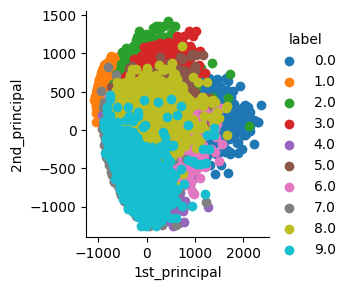

In [47]:
# Plotting
sns.FacetGrid(dataframe, hue="label").map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()